<center>
<h1> Credit Card Spend Prediction - Case Study
</center>

<big>
**Business Context**: One of the global banks would like to understand what factors driving the credit card spend are. The objective of the case study is to understand what's driving the total spend (Primary and Secondary Card)

In [1]:
#Import lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)

In [2]:
#using seaborn style

plt.style.use("seaborn")

## Loading the Data

In [3]:
creditcard_data = pd.read_csv("Dataset/CREDIT CARD USERS DATA.csv")

C:\Users\NiranjanKumar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
creditcard_data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
creditcard_data.shape

(5000, 132)

## Exploratory Analysis

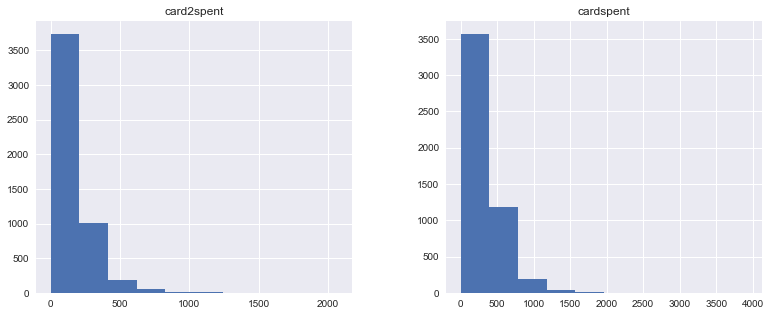

In [6]:
#Distribution of spends

creditcard_data.loc[:,["cardspent", "card2spent"]].hist(figsize = (13,5))

plt.show()

- Creating a new Derived Variable "TotalCreditSpend" which is a summation of primary and secondary spend
- Droping "cardspent"(Primary card), "card2spend"(Secondary card) and carditems,card2items as they are depend on spending

In [7]:
creditcard_data["TotalCreditSpend"] = creditcard_data["cardspent"] + creditcard_data["card2spent"]

In [8]:
#dropping the redudant variables

creditcard_data.drop(["cardspent", "card2spent", "carditems", "card2items", "custid"], axis = 1, inplace=True)

In [9]:
creditcard_data.shape

(5000, 128)

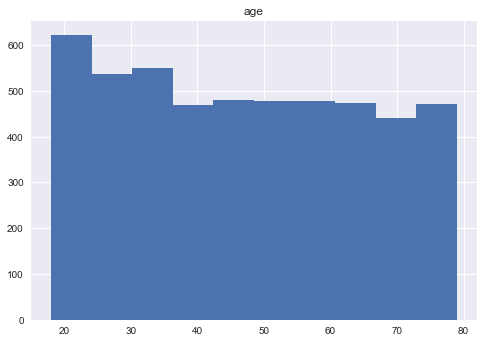

In [10]:
#Checking the age distribution of customers

creditcard_data.loc[:,["age"]].hist()

plt.show()

## Segregating Categorical and Numerical Data

In [11]:
#filtering the names of numerical and categorical variables

numeric_var_names = [key for key in dict(creditcard_data.dtypes) if dict(creditcard_data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names = [key for key in dict(creditcard_data.dtypes) if dict(creditcard_data.dtypes)[key] in ['object']]

In [12]:
print(numeric_var_names)

['region', 'gender', 'age', 'agecat', 'ed', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'income', 'lninc', 'inccat', 'debtinc', 'creddebt', 'othdebt', 'default', 'jobsat', 'marital', 'spoused', 'spousedcat', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carvalue', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'active', 'bfast', 'tenure', 'churn', 'longmon', 'lnlongmon', 'tollfree', 'tollmon', 'tollten', 'equip', 'equipmon', 'equipt

In [13]:
print(cat_var_names)

['townsize', 'birthmonth', 'lncreddebt', 'lnothdebt', 'commutetime', 'longten', 'lnlongten', 'lntollmon', 'lntollten', 'lnequipmon', 'lnequipten', 'lncardmon', 'cardten', 'lncardten', 'lnwiremon', 'lnwireten']


In [14]:
#numeric data

creditcard_numericdata = creditcard_data[numeric_var_names]

In [15]:
creditcard_numericdata.head()

,region,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,TotalCreditSpend
0,1.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,149.46
1,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,77.54
2,3.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,16.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,359.97
3,4.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,359.41
4,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,507.83


In [16]:
#categorical data

creditcard_catdata = creditcard_data[cat_var_names]

In [17]:
creditcard_catdata.head()

,townsize,birthmonth,lncreddebt,lnothdebt,commutetime,longten,lnlongten,lntollmon,lntollten,lnequipmon,lnequipten,lncardmon,cardten,lncardten,lnwiremon,lnwireten
0,2.00,September,0.18,0.81,22.00,34.40,3.54,3.37,5.08,3.38,4.84,2.66,60.00,4.09,#NULL!,#NULL!
1,5.00,May,0.20,0.45,29.00,330.60,5.80,#NULL!,#NULL!,4.00,7.59,2.77,610.00,6.41,3.82,7.43
2,4.00,June,-0.07,0.93,24.00,1858.35,7.53,#NULL!,#NULL!,#NULL!,#NULL!,3.14,1410.00,7.25,#NULL!,#NULL!
3,3.00,May,-3.78,0.11,38.00,199.45,5.30,#NULL!,#NULL!,#NULL!,#NULL!,3.04,685.00,6.53,#NULL!,#NULL!
4,2.00,July,-1.54,-1.74,32.00,74.10,4.31,2.80,5.96,#NULL!,#NULL!,2.85,360.00,5.89,2.95,6.02


In [18]:
# converting all the numerical values present in string format to numeric format
# using errors = "coerce" to supress any errors into Nan values

creditcard_data.townsize = pd.to_numeric(creditcard_catdata.townsize, errors="coerce")
creditcard_data.lncreddebt = pd.to_numeric(creditcard_catdata.lncreddebt , errors="coerce")
creditcard_data.lnothdebt = pd.to_numeric(creditcard_catdata.lnothdebt, errors="coerce")
creditcard_data.commutetime = pd.to_numeric(creditcard_catdata.commutetime, errors="coerce")
creditcard_data.longten = pd.to_numeric(creditcard_catdata.longten, errors="coerce")
creditcard_data.lnlongten = pd.to_numeric(creditcard_catdata.lnlongten, errors="coerce")
creditcard_data.lntollmon = pd.to_numeric(creditcard_catdata.lntollmon, errors="coerce")
creditcard_data.lntollten = pd.to_numeric(creditcard_catdata.lntollten, errors="coerce")
creditcard_data.lnequipmon = pd.to_numeric(creditcard_catdata.lnequipmon, errors="coerce")
creditcard_data.lnequipten = pd.to_numeric(creditcard_catdata.lnequipten, errors="coerce")
creditcard_data.lncardmon = pd.to_numeric(creditcard_catdata.lncardmon, errors="coerce")
creditcard_data.cardten = pd.to_numeric(creditcard_catdata.cardten, errors="coerce")
creditcard_data.lncardten = pd.to_numeric(creditcard_catdata.lncardten, errors="coerce")
creditcard_data.lnwiremon = pd.to_numeric(creditcard_catdata.lnwiremon, errors="coerce")
creditcard_data.lnwireten = pd.to_numeric(creditcard_catdata.lnwireten, errors="coerce")

# Data Preparation
- Missing Values
- Handling of categorical variables

## Missing Values

In [19]:
creditcard_data.shape[0]

5000

In [20]:
missing_df = pd.DataFrame(creditcard_data.isnull().sum()).reset_index()
missing_df.columns = ["ColumnName", "MissingCount"]

In [21]:
missing_df["Percent_Missing"] = round(missing_df["MissingCount"]/creditcard_data.shape[0],3) * 100

In [22]:
missing_df.sort_values(by = "MissingCount", ascending=False)

,ColumnName,MissingCount,Percent_Missing
101,lnwiremon,3656,73.1
103,lnwireten,3656,73.1
93,lnequipten,3296,65.9
91,lnequipmon,3296,65.9
88,lntollten,2622,52.4
86,lntollmon,2622,52.4
98,lncardten,1422,28.4
96,lncardmon,1419,28.4
82,longten,3,0.1
83,lnlongten,3,0.1


- Dropping all the columns having more than 25% of Missing values in the data

In [23]:
creditcard_data.drop(["lnwiremon", "lnwireten", "lnequipten", "lnequipmon", "lntollmon", "lntollten", 
                      "lncardten", "lncardmon"], axis = 1, inplace = True)

In [24]:
#dimensions after dropping the columns

creditcard_data.shape

(5000, 120)

<big>

- From total of 132 variables, variables are brought down to 120 variables

## Missing Value imputation

In [25]:
creditcard_data.head()

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,TotalCreditSpend
0,1.0,2.0,1.0,20.0,2.0,September,15.0,3.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,149.46
1,5.0,5.0,0.0,22.0,2.0,May,17.0,4.0,2.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,77.54
2,3.0,4.0,1.0,67.0,6.0,June,14.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,359.97
3,4.0,3.0,0.0,23.0,2.0,May,16.0,3.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,359.41
4,2.0,2.0,0.0,26.0,3.0,July,16.0,3.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,507.83


In [26]:
#imputing with median

creditcard_data.lnlongten.fillna(creditcard_data.lnlongten.median(),inplace=True)
creditcard_data.longten.fillna(creditcard_data.longten.median(),inplace=True)
creditcard_data.townsize.fillna(creditcard_data.townsize.median(),inplace=True)
creditcard_data.cardten.fillna(creditcard_data.cardten.median(),inplace=True)

creditcard_data.commutetime.fillna(creditcard_data.commutetime.median(),inplace=True)
creditcard_data.lnothdebt.fillna(creditcard_data.lnothdebt.median(),inplace=True)
creditcard_data.lnothdebt.fillna(creditcard_data.lnothdebt.median(),inplace=True)
creditcard_data.lncreddebt.fillna(creditcard_data.lncreddebt.median(), inplace=True)

## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [27]:
# an function to create dummies

def create_dummies(df, name):
    col_dummies = pd.get_dummies(df[name],prefix=name)
    col_dummies.drop(col_dummies.columns[0], axis=1,inplace = True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop(name, axis = 1,inplace = True)
    
    return df

In [28]:
# generating the dummies for 'birthmonth'

creditcard_data = create_dummies(creditcard_data, "birthmonth")

In [29]:
creditcard_data.head()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September
0,1.0,2.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,5.0,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,3.0,4.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,16.0,...,0,0,0,0,1,0,0,0,0,0
3,4.0,3.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,0


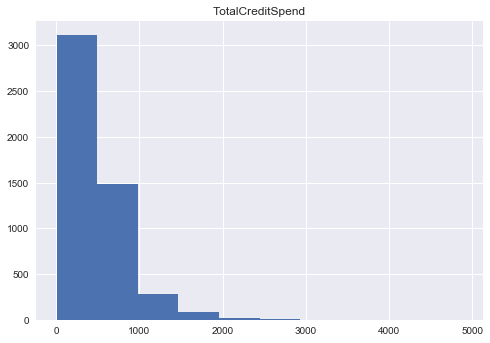

In [30]:
#checking the distribution of Target variable

creditcard_data[["TotalCreditSpend"]].hist()

plt.show()

<big>
- Target variable is postively skewed, so taking the log transformation

In [31]:
creditcard_data['ln_totalcreditspend'] = np.log(creditcard_data["TotalCreditSpend"] + 1)

In [32]:
#dropping the TotalCreditSpend

creditcard_data.drop(["TotalCreditSpend"],axis =1, inplace=True)

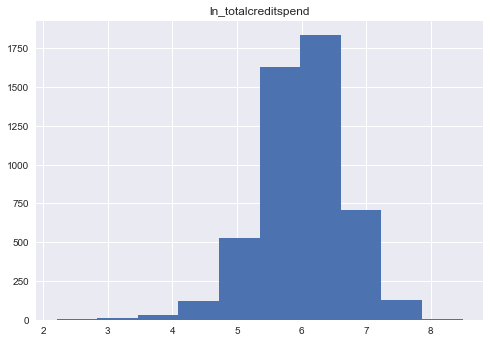

In [33]:
#checking the distribution of Target variable

#Log(TotalCreditSpend)
(creditcard_data[["ln_totalcreditspend"]]).hist()

plt.show()

In [35]:
#exporting cleaned data

creditcard_data.to_csv("cleaneddata_creditcard.csv",index=False)